In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##### Load data

In [2]:
# read data from file
data = pd.read_csv('./data/house_data.csv')
#data.head()

##### Select only data for 'Type' 'Villa'

In [3]:
data = data[data['Type'] == 'Villa']

##### Before dropping columns

In [4]:
#data.info()

##### Drop non-relevant columns (incl. Type +  Boligydelse)

In [5]:
data.drop([
    'Vejareal',
    'Lands ejerlav kode',
    'Kommunal ejerlav kode',
    'Ejendomsnummer',
    'Primær matrikel',
    'Lands ejerlav navn',
    'Kommunal ejerlav navn',
    'Matrikelnummer',
    'Afvigende etager',
    'Boligstørrelse tinglyst',
    'Objekt status',
    'Boligstørrelse BBR',
    'Bygningsnummer',
    'Beboelsesareal',
    'URL',
    'Boligydelse',
    'Anvendelse',
    'Type',
    'Boligstørrelse'
], 'columns', inplace=True)

##### Missing values

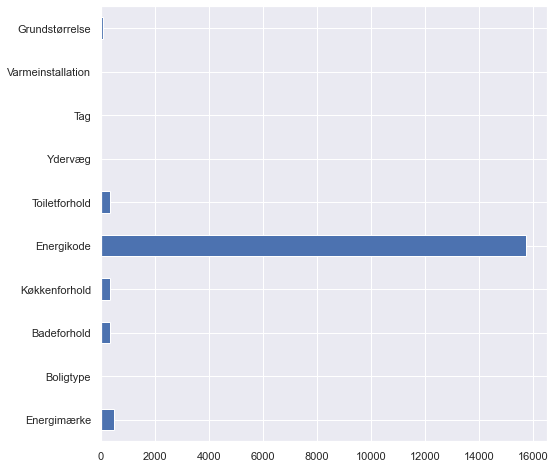

In [6]:
sb.set(font_scale=1)
data_null = data.isna().sum()
plt.figure(figsize=(8,8))
data_null[data_null!=0].plot(kind='barh');

In [7]:
# drop columns if lot of missing values
data.drop(['Energikode'], 'columns', inplace=True)

In [8]:
# Find missing values in the data and drop those rows:
print('rows before drop n/a',len(data))
bool_matrix = data.isnull() # dataframe with True and False values for each cell in the villa_data
only_null_filter = bool_matrix.any(axis=1) # is there a True value in any column in each row. returns a pandas Series with index matching index of villa dataframe
missing = data[only_null_filter] # show all rows that has one or more null values
data = data.dropna()
print('rows after',len(data))
#pd.options.display.max_rows = None # let me see all rows in the dataframe (can be used with columns too)
#villa_data
#bool_matrix

rows before drop n/a 23750
rows after 22870


##### After dropping columns

In [9]:
#data.info()

### Format values

In [10]:
# Address to zipcode
data['Adresse'] = data['Adresse'].str.extract(r'(\d{4})').astype('int')

In [11]:
# Year build
data['Year build'] = data['Year build'].astype('int')

In [12]:
# Price
data['Pris'] = data['Pris'].astype('float')

In [13]:
# Ejerudgift
data['Ejerudgift'] = data['Ejerudgift'].astype('float')

In [14]:
# Enhedsareal
data['Enhedsareal'] = data['Enhedsareal'].astype('float')

In [15]:
#data.info()

##### Numerical data

In [16]:
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Adresse,Year build,Pris,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Etager,Carport,Seneste ombygning,Udhus,Boligenhed med eget køkken,Boligenhed uden eget køkken,Grundstørrelse,Ejendomsværdiskat,Grundskyld
count,22870.000000,22870.000000,2.287000e+04,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000
mean,6726.924792,1944.464582,2.278292e+06,2459.835942,161.333406,5.163620,1.680280,1.378094,1.033581,1.372234,886.171928,1.513511,1.005334,0.002842,1959.639265,10581.997289,9339.400437
std,2097.234964,68.470341,2.324226e+06,1689.445639,61.946787,1.706089,0.665097,0.567289,0.187292,7.216243,987.998702,9.876945,0.139862,0.064390,6664.143774,9139.674495,10875.883009
min,2000.000000,0.000000,1.450000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,4000.000000,1892.000000,6.950000e+05,1281.000000,101.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,460.000000,4400.000000,2148.000000
25%,4912.000000,1922.000000,9.990000e+05,1608.000000,124.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,700.000000,6200.000000,3674.000000
50%,6823.000000,1957.000000,1.695000e+06,2093.000000,152.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,867.000000,8925.000000,6603.000000
75%,8660.000000,1973.000000,2.745000e+06,2780.000000,186.000000,6.000000,2.000000,2.000000,1.000000,0.000000,1984.000000,0.000000,1.000000,0.000000,1182.000000,12600.000000,10727.000000
90%,9490.000000,1998.000000,4.295000e+06,3862.100000,228.000000,7.000000,2.000000,2.000000,1.000000,0.000000,2001.000000,0.000000,1.000000,0.000000,2602.100000,17850.000000,18666.000000
max,9990.000000,2021.000000,5.950000e+07,62140.000000,1900.000000,46.000000,19.000000,9.000000,4.000000,140.000000,2020.000000,282.000000,6.000000,5.000000,265692.000000,323200.000000,287046.000000


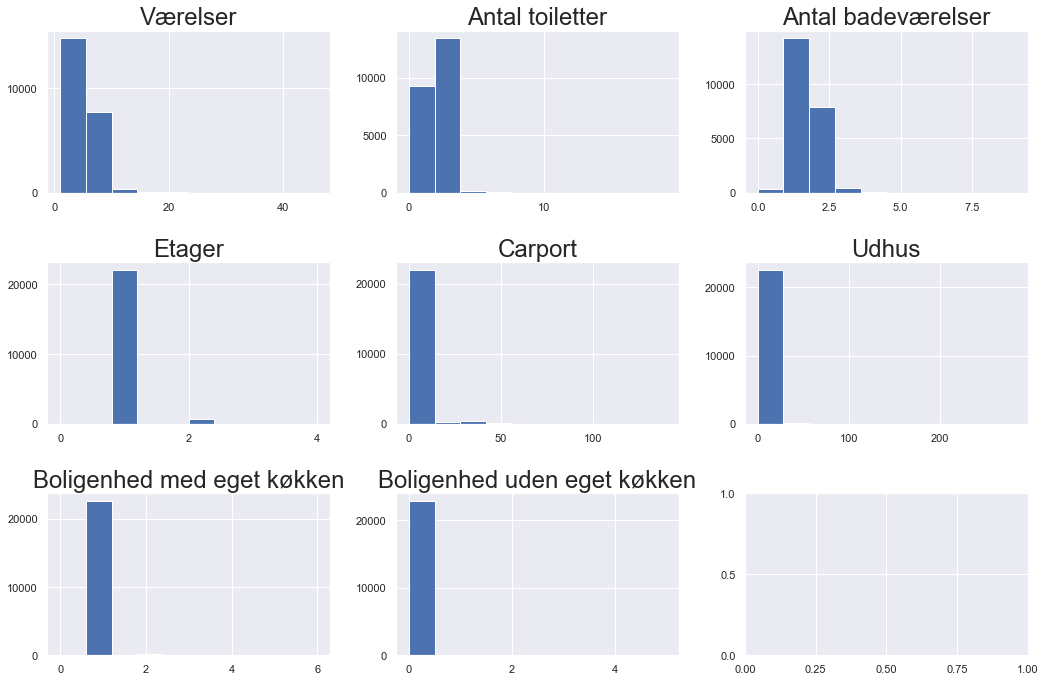

In [17]:
#pick out features, which have one dominant value in the whole sample
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
sb.set(font_scale=2)

data['Værelser'].hist(ax=axes[0,0])
axes[0,0].set_title('Værelser')

data['Antal toiletter'].hist(ax=axes[0,1])
axes[0,1].set_title('Antal toiletter')

data['Antal badeværelser'].hist(ax=axes[0,2])
axes[0,2].set_title('Antal badeværelser')

data['Etager'].hist(ax=axes[1,0])
axes[1,0].set_title('Etager')

data['Carport'].hist(ax=axes[1,1])
axes[1,1].set_title('Carport')

data['Udhus'].hist(ax=axes[1,2])
axes[1,2].set_title('Udhus')

data['Boligenhed med eget køkken'].hist(ax=axes[2,0])
axes[2,0].set_title('Boligenhed med eget køkken')

data['Boligenhed uden eget køkken'].hist(ax=axes[2,1])
axes[2,1].set_title('Boligenhed uden eget køkken')

plt.tight_layout()

# drop features
data.drop([
    'Carport',
    'Udhus',
    'Boligenhed med eget køkken',
    'Boligenhed uden eget køkken'
], 'columns', inplace=True)

In [18]:
#data.info()

##### Abnormal feature values - before

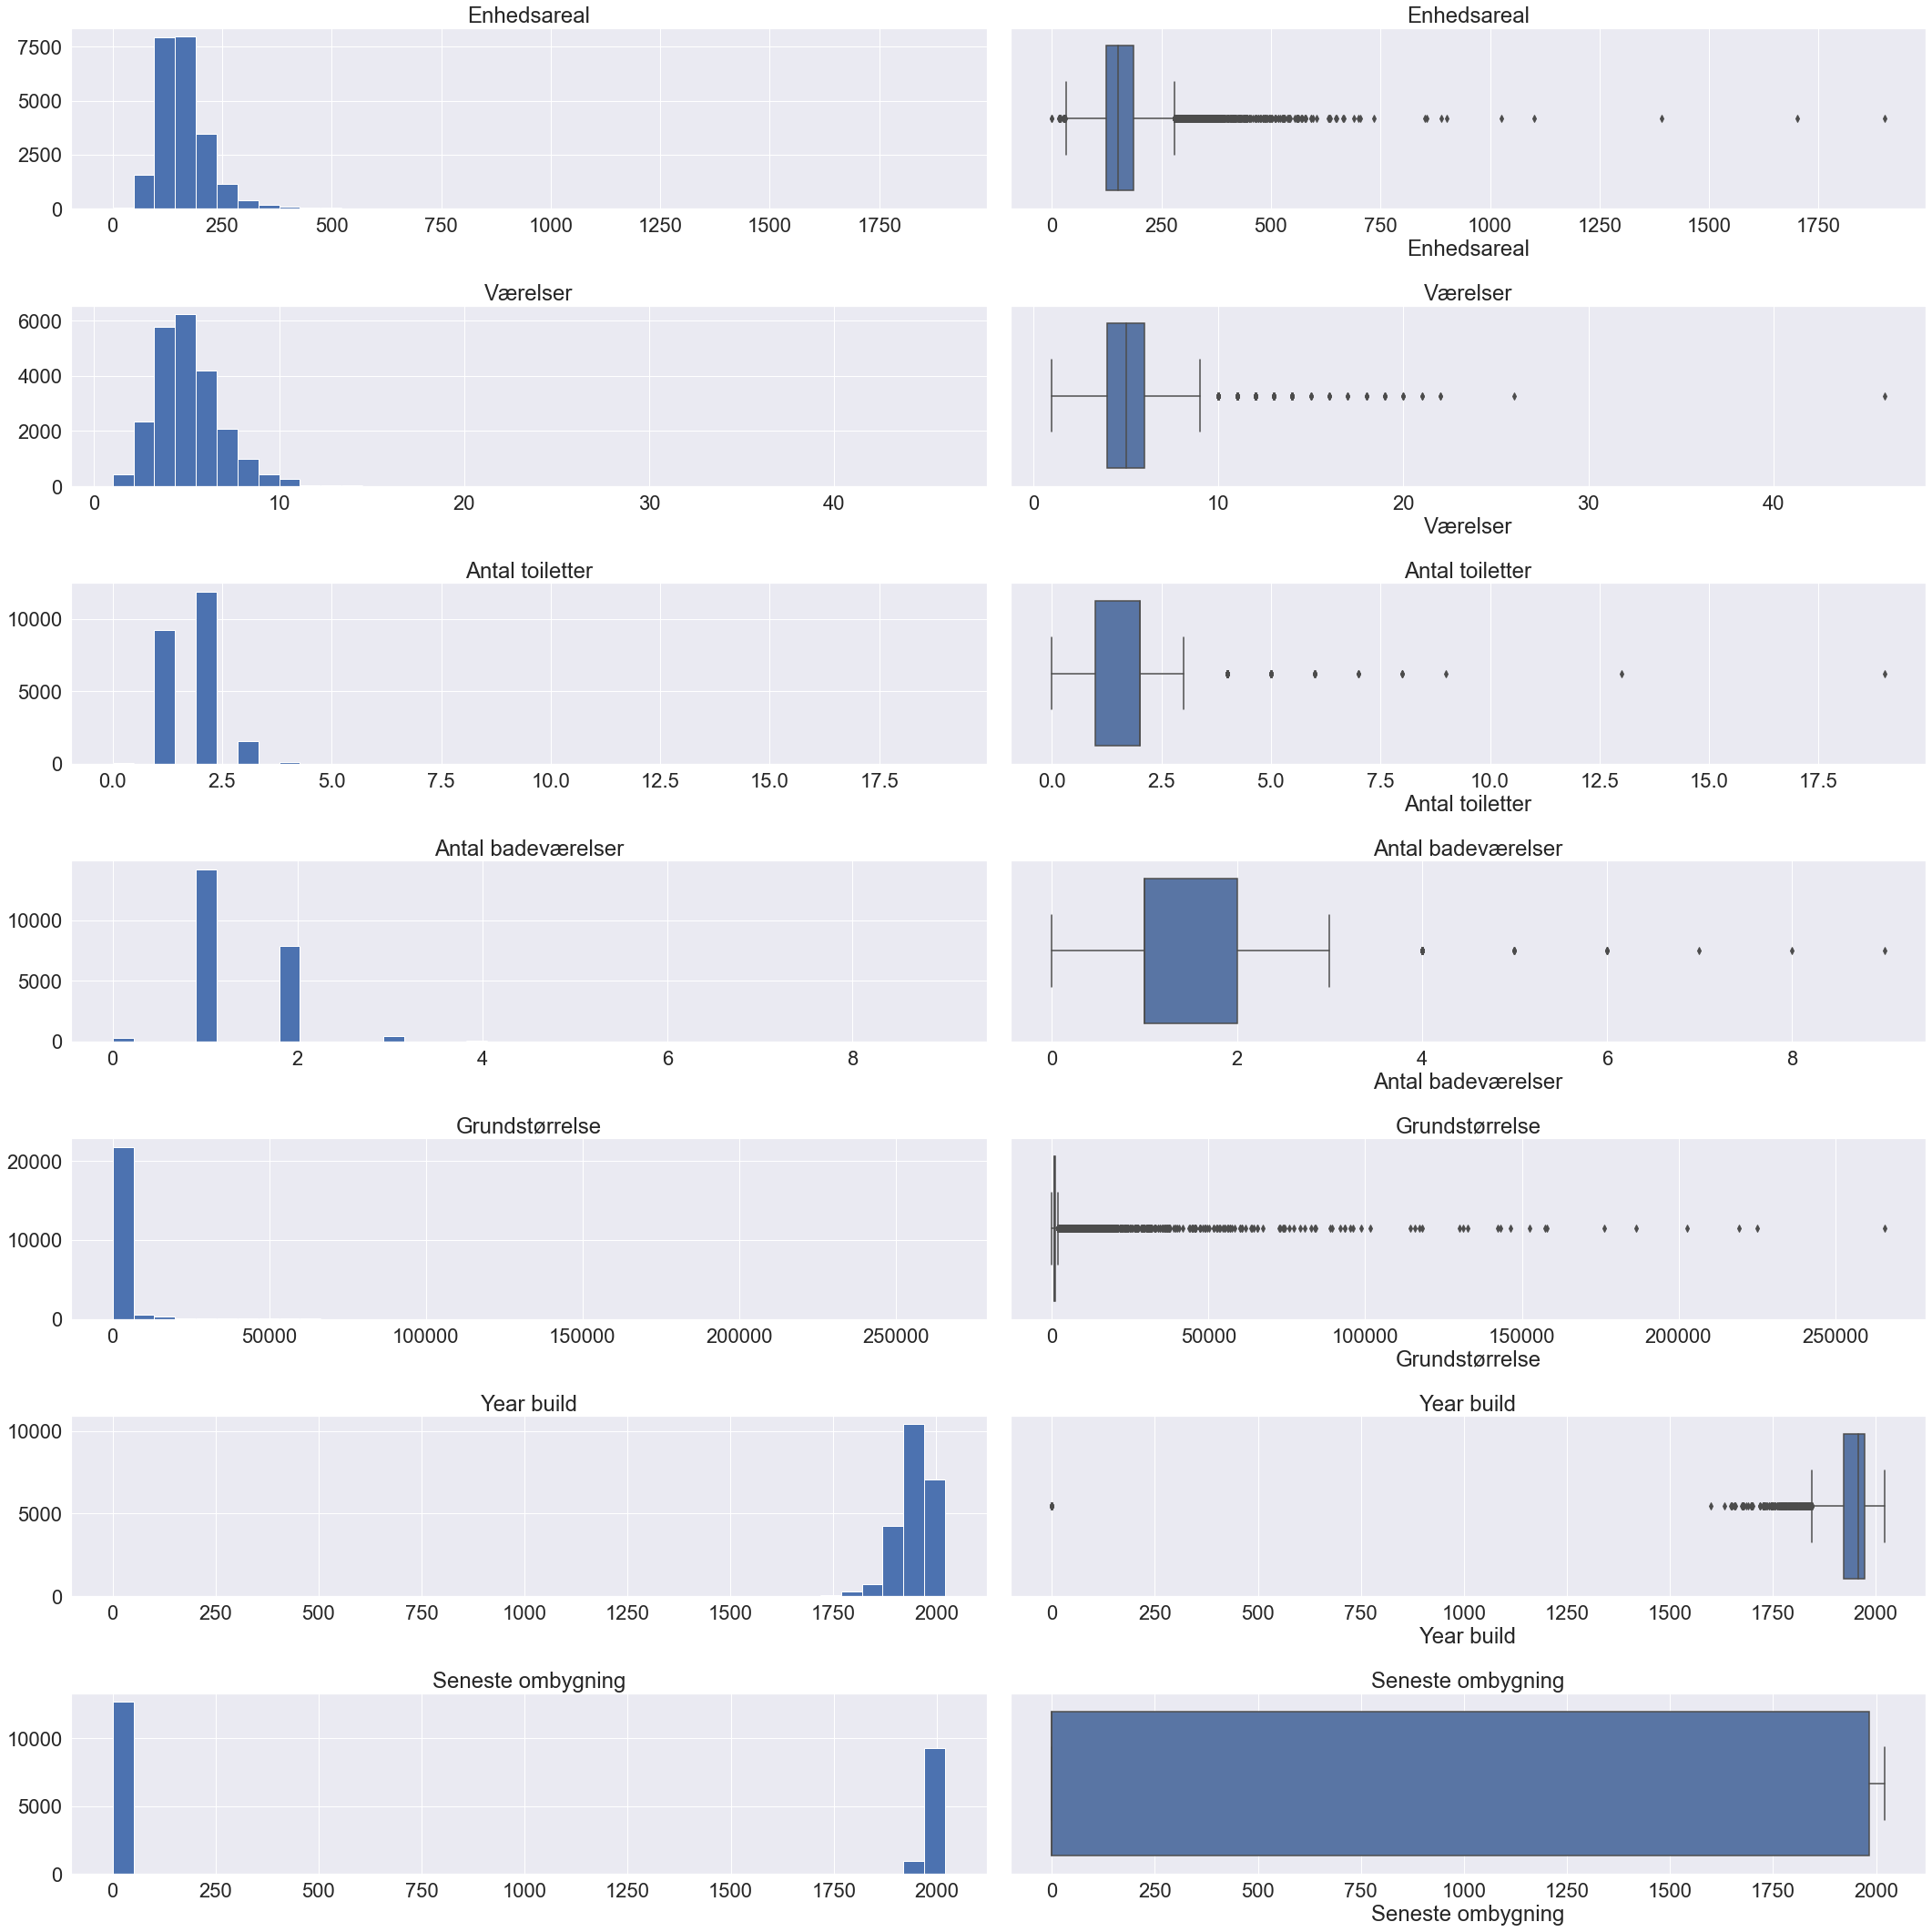

In [19]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(30,30))
sb.set(font_scale=2)

data['Enhedsareal'].hist(ax=axes[0,0], bins=40);
axes[0,0].set_title('Enhedsareal')
sb.boxplot(ax=axes[0,1], x=data['Enhedsareal'])
axes[0,1].set_title('Enhedsareal')

data['Værelser'].hist(ax=axes[1,0], bins=40);
axes[1,0].set_title('Værelser')
sb.boxplot(ax=axes[1,1], x=data['Værelser'])
axes[1,1].set_title('Værelser')

data['Antal toiletter'].hist(ax=axes[2,0], bins=40);
axes[2,0].set_title('Antal toiletter')
sb.boxplot(ax=axes[2,1], x=data['Antal toiletter'])
axes[2,1].set_title('Antal toiletter')

data['Antal badeværelser'].hist(ax=axes[3,0], bins=40);
axes[3,0].set_title('Antal badeværelser')
sb.boxplot(ax=axes[3,1], x=data['Antal badeværelser'])
axes[3,1].set_title('Antal badeværelser')

data['Grundstørrelse'].hist(ax=axes[4,0], bins=40);
axes[4,0].set_title('Grundstørrelse')
sb.boxplot(ax=axes[4,1], x=data['Grundstørrelse'])
axes[4,1].set_title('Grundstørrelse')

data['Year build'].hist(ax=axes[5,0], bins=40);
axes[5,0].set_title('Year build')
sb.boxplot(ax=axes[5,1], x=data['Year build'])
axes[5,1].set_title('Year build')

data['Seneste ombygning'].hist(ax=axes[6,0], bins=40);
axes[6,0].set_title('Seneste ombygning')
sb.boxplot(ax=axes[6,1], x=data['Seneste ombygning'])
axes[6,1].set_title('Seneste ombygning')

plt.tight_layout()

In [20]:
# drop abnormal feature values
print(pd.value_counts(data['Enhedsareal']<300))
data = data[data['Enhedsareal']<300]

print(pd.value_counts(data['Værelser']<10))
data = data[data['Værelser']<10]

print(pd.value_counts(data['Antal toiletter']<=3))
data = data[data['Antal toiletter']<=3]

print(pd.value_counts(data['Antal badeværelser']<=3))
data = data[data['Antal badeværelser']<=3]

print(pd.value_counts(data['Grundstørrelse']<1500))
data = data[data['Grundstørrelse']<1500]

print(pd.value_counts( (data['Year build']>1850) & (data['Year build']<2020) ))
data = data[ (data['Year build']>1850) & (data['Year build']<2020) ]

True     22270
False      600
Name: Enhedsareal, dtype: int64
True     22099
False      171
Name: Værelser, dtype: int64
True     22035
False       64
Name: Antal toiletter, dtype: int64
True     22033
False        2
Name: Antal badeværelser, dtype: int64
True     18602
False     3431
Name: Grundstørrelse, dtype: int64
True     17986
False      616
Name: Year build, dtype: int64


##### Format abnormal data

In [21]:
print(pd.value_counts ((data['Seneste ombygning']<1850)))
#data['Seneste ombygning'].loc[data['Seneste ombygning'] < 1850, 'Seneste ombygning '] = data['Year build']
data['Seneste ombygning'] = np.where(data['Seneste ombygning'] < 1850, data['Year build'], data['Seneste ombygning'])

True     10537
False     7449
Name: Seneste ombygning, dtype: int64


##### Abnormal feature values - after

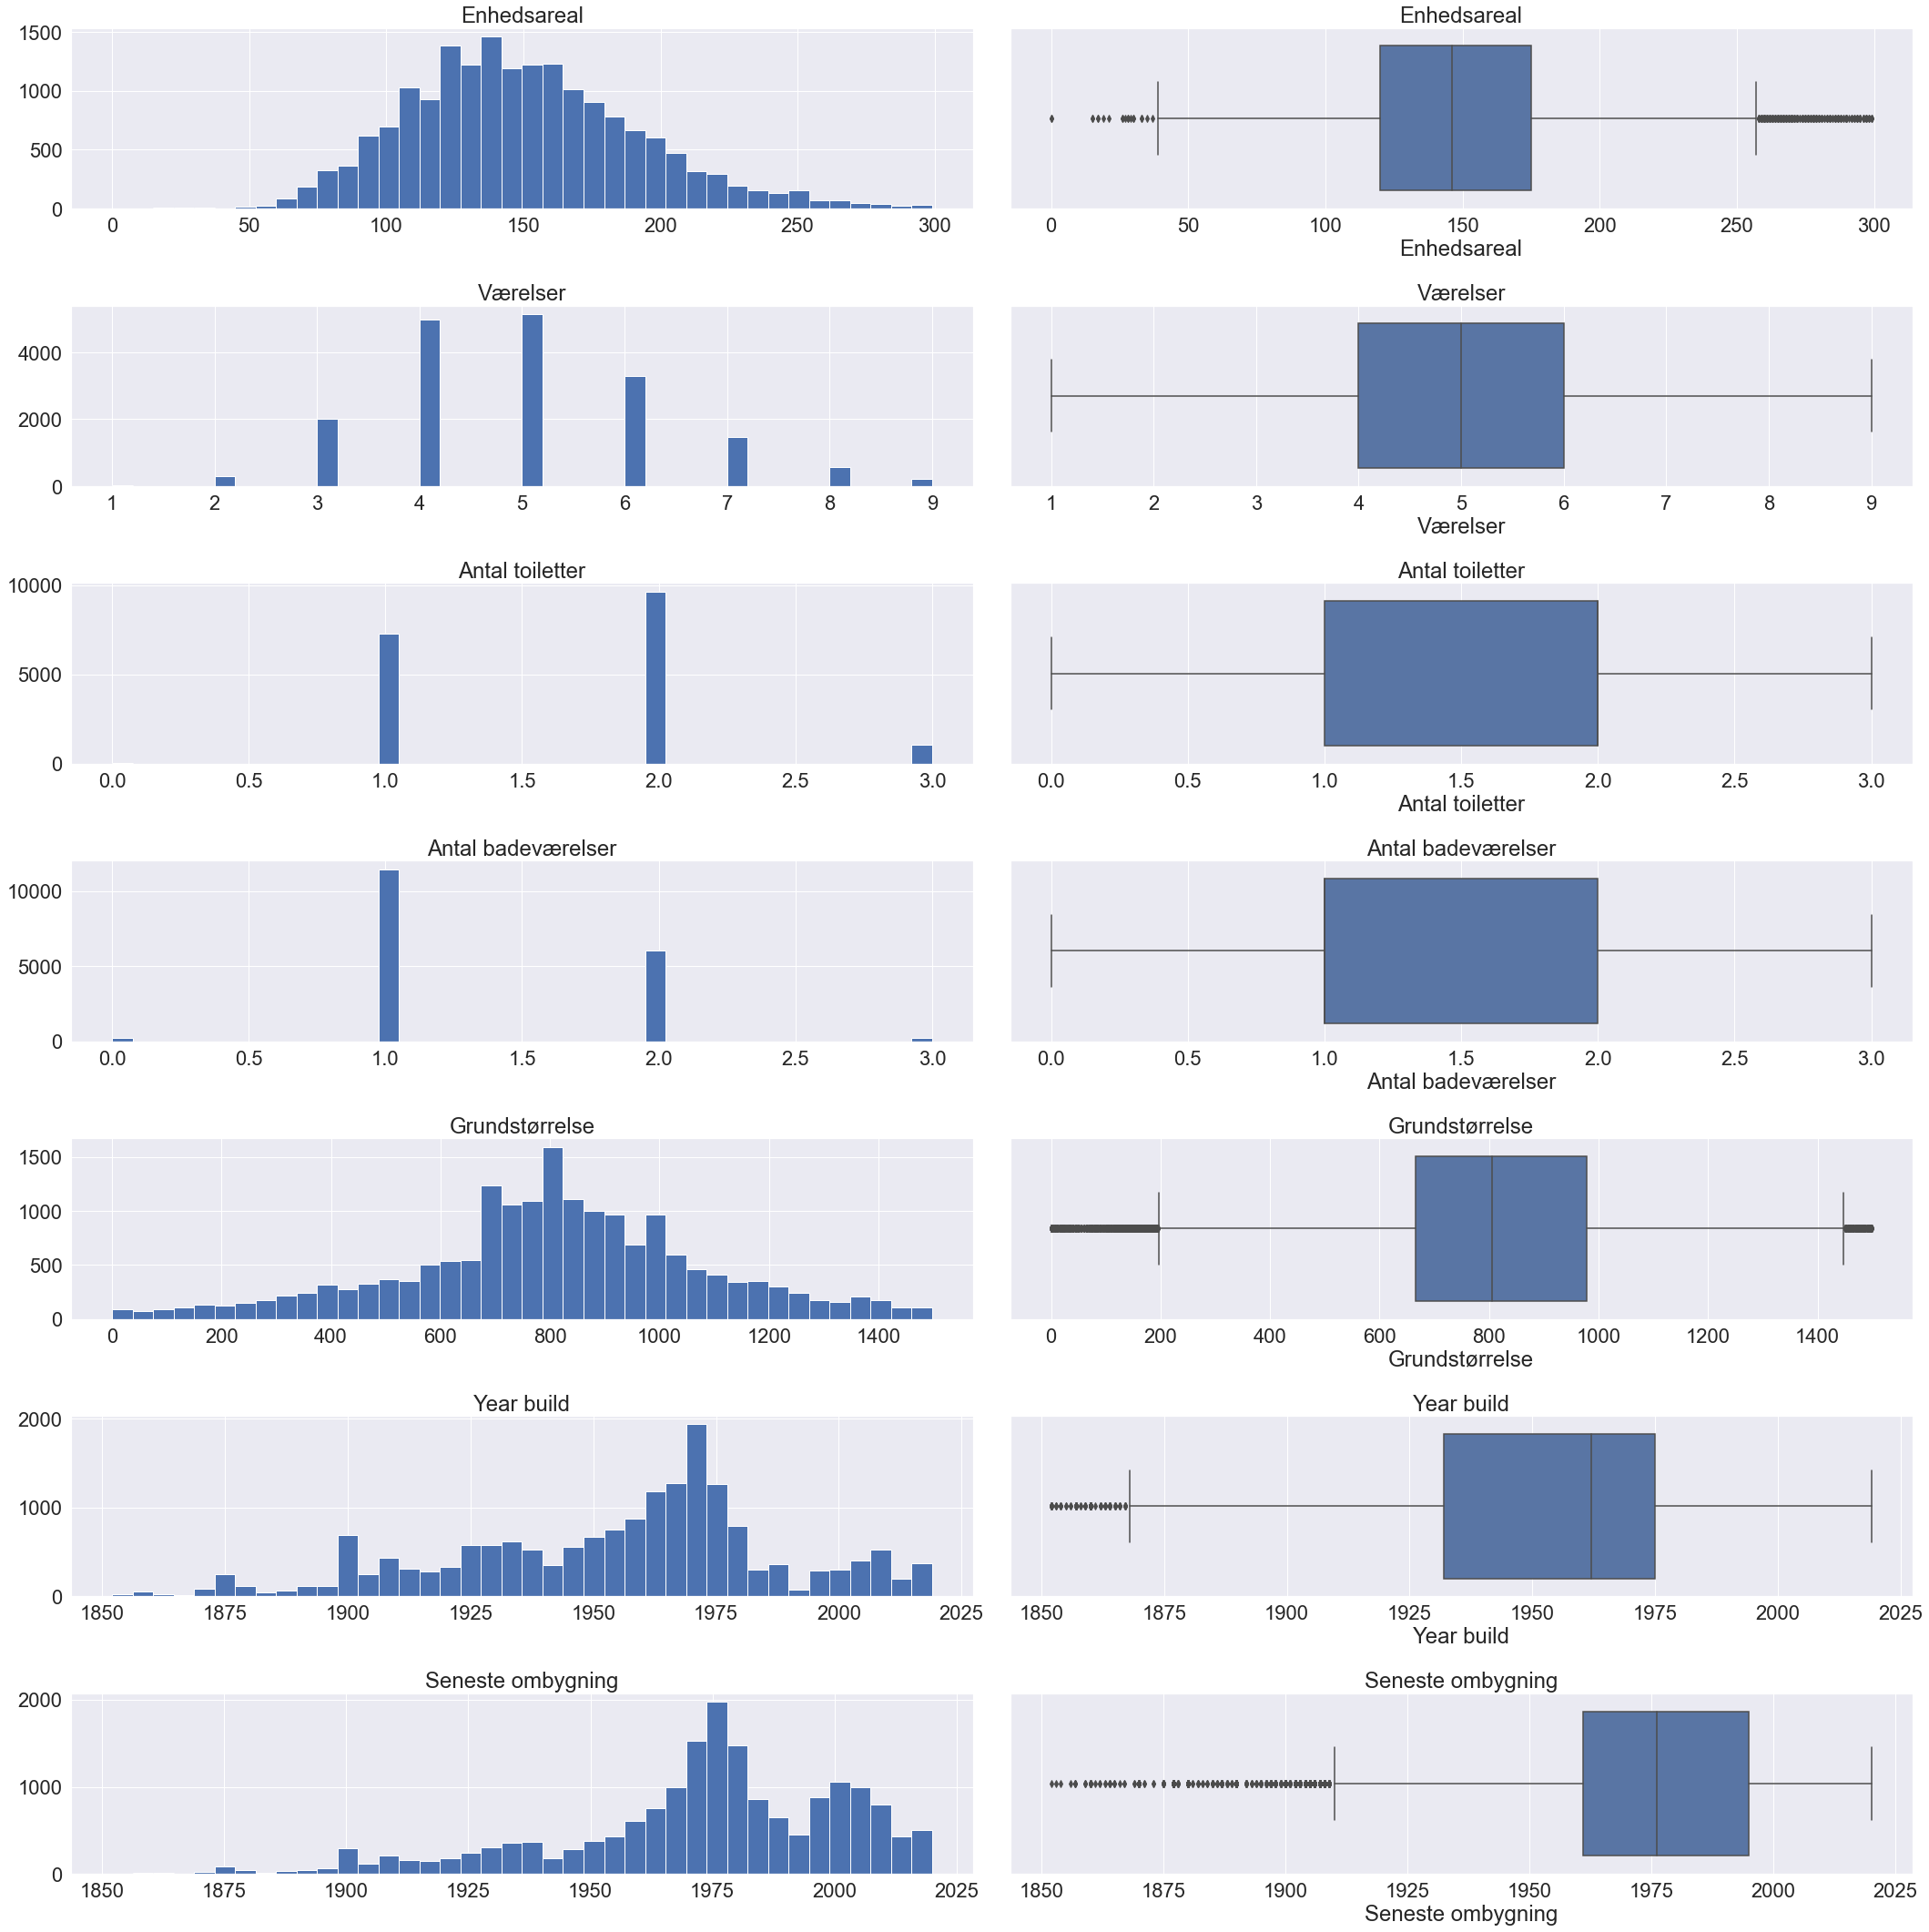

In [22]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(30,30))
sb.set(font_scale=2)

data['Enhedsareal'].hist(ax=axes[0,0], bins=40);
axes[0,0].set_title('Enhedsareal')
sb.boxplot(ax=axes[0,1], x=data['Enhedsareal'])
axes[0,1].set_title('Enhedsareal')

data['Værelser'].hist(ax=axes[1,0], bins=40);
axes[1,0].set_title('Værelser')
sb.boxplot(ax=axes[1,1], x=data['Værelser'])
axes[1,1].set_title('Værelser')

data['Antal toiletter'].hist(ax=axes[2,0], bins=40);
axes[2,0].set_title('Antal toiletter')
sb.boxplot(ax=axes[2,1], x=data['Antal toiletter'])
axes[2,1].set_title('Antal toiletter')

data['Antal badeværelser'].hist(ax=axes[3,0], bins=40);
axes[3,0].set_title('Antal badeværelser')
sb.boxplot(ax=axes[3,1], x=data['Antal badeværelser'])
axes[3,1].set_title('Antal badeværelser')

data['Grundstørrelse'].hist(ax=axes[4,0], bins=40);
axes[4,0].set_title('Grundstørrelse')
sb.boxplot(ax=axes[4,1], x=data['Grundstørrelse'])
axes[4,1].set_title('Grundstørrelse')

data['Year build'].hist(ax=axes[5,0], bins=40);
axes[5,0].set_title('Year build')
sb.boxplot(ax=axes[5,1], x=data['Year build'])
axes[5,1].set_title('Year build')

data['Seneste ombygning'].hist(ax=axes[6,0], bins=40);
axes[6,0].set_title('Seneste ombygning')
sb.boxplot(ax=axes[6,1], x=data['Seneste ombygning'])
axes[6,1].set_title('Seneste ombygning')

plt.tight_layout()

### Categorical features

In [23]:
pd.set_option('display.max_columns', 40)
data.describe(include='all')

,Adresse,Year build,Pris,Energimærke,Ejerudgift,Boligtype,Enhedsareal,Værelser,Antal toiletter,Badeforhold,Antal badeværelser,Køkkenforhold,Toiletforhold,Ydervæg,Tag,Etager,Seneste ombygning,Varmeinstallation,Grundstørrelse,Ejendomsværdiskat,Grundskyld
count,17986.000000,17986.000000,1.798600e+04,17986,17986.000000,17986,17986.000000,17986.000000,17986.000000,17986,17986.000000,17986,17986,17986,17986,17986.000000,17986.000000,17986,17986.000000,17986.000000,17986.000000
unique,NaN,NaN,NaN,13,NaN,5,NaN,NaN,NaN,3,NaN,4,3,11,12,NaN,NaN,9,NaN,NaN,NaN
top,NaN,NaN,NaN,D,NaN,Egentlig beboelseslejlighed boligenhed med ege...,NaN,NaN,NaN,Badeværelse i enheden,NaN,Eget køkken med afløb,Vandskyllende toilet i enheden,Mursten,Fibercement herunder asbest,NaN,NaN,Fjernvarme blokvarme,NaN,NaN,NaN
freq,NaN,NaN,NaN,5927,NaN,17722,NaN,NaN,NaN,17765,NaN,17945,17965,16448,7825,NaN,NaN,9252,NaN,NaN,NaN
mean,6737.659847,1954.567942,2.167924e+06,NaN,2375.291949,NaN,149.866674,4.928444,1.650228,NaN,1.350384,NaN,NaN,NaN,NaN,1.031803,1972.345658,NaN,803.878906,10347.947904,9407.340098
std,2130.673697,33.274718,1.928378e+06,NaN,1292.048240,NaN,41.970350,1.369896,0.587450,NaN,0.526627,NaN,NaN,NaN,NaN,0.182621,30.016383,NaN,280.218649,6517.205902,9278.387751
min,2000.000000,1852.000000,1.450000e+05,NaN,0.000000,NaN,0.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,1852.000000,NaN,0.000000,0.000000,0.000000
25%,4900.000000,1932.000000,9.950000e+05,NaN,1595.000000,NaN,120.000000,4.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,1961.000000,NaN,665.000000,6300.000000,4002.000000
50%,6900.000000,1962.000000,1.645000e+06,NaN,2072.000000,NaN,146.000000,5.000000,2.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,1976.000000,NaN,805.000000,9100.000000,7014.000000
75%,8700.000000,1975.000000,2.695000e+06,NaN,2731.000000,NaN,175.000000,6.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,NaN,1.000000,1995.000000,NaN,978.000000,13000.000000,11006.500000


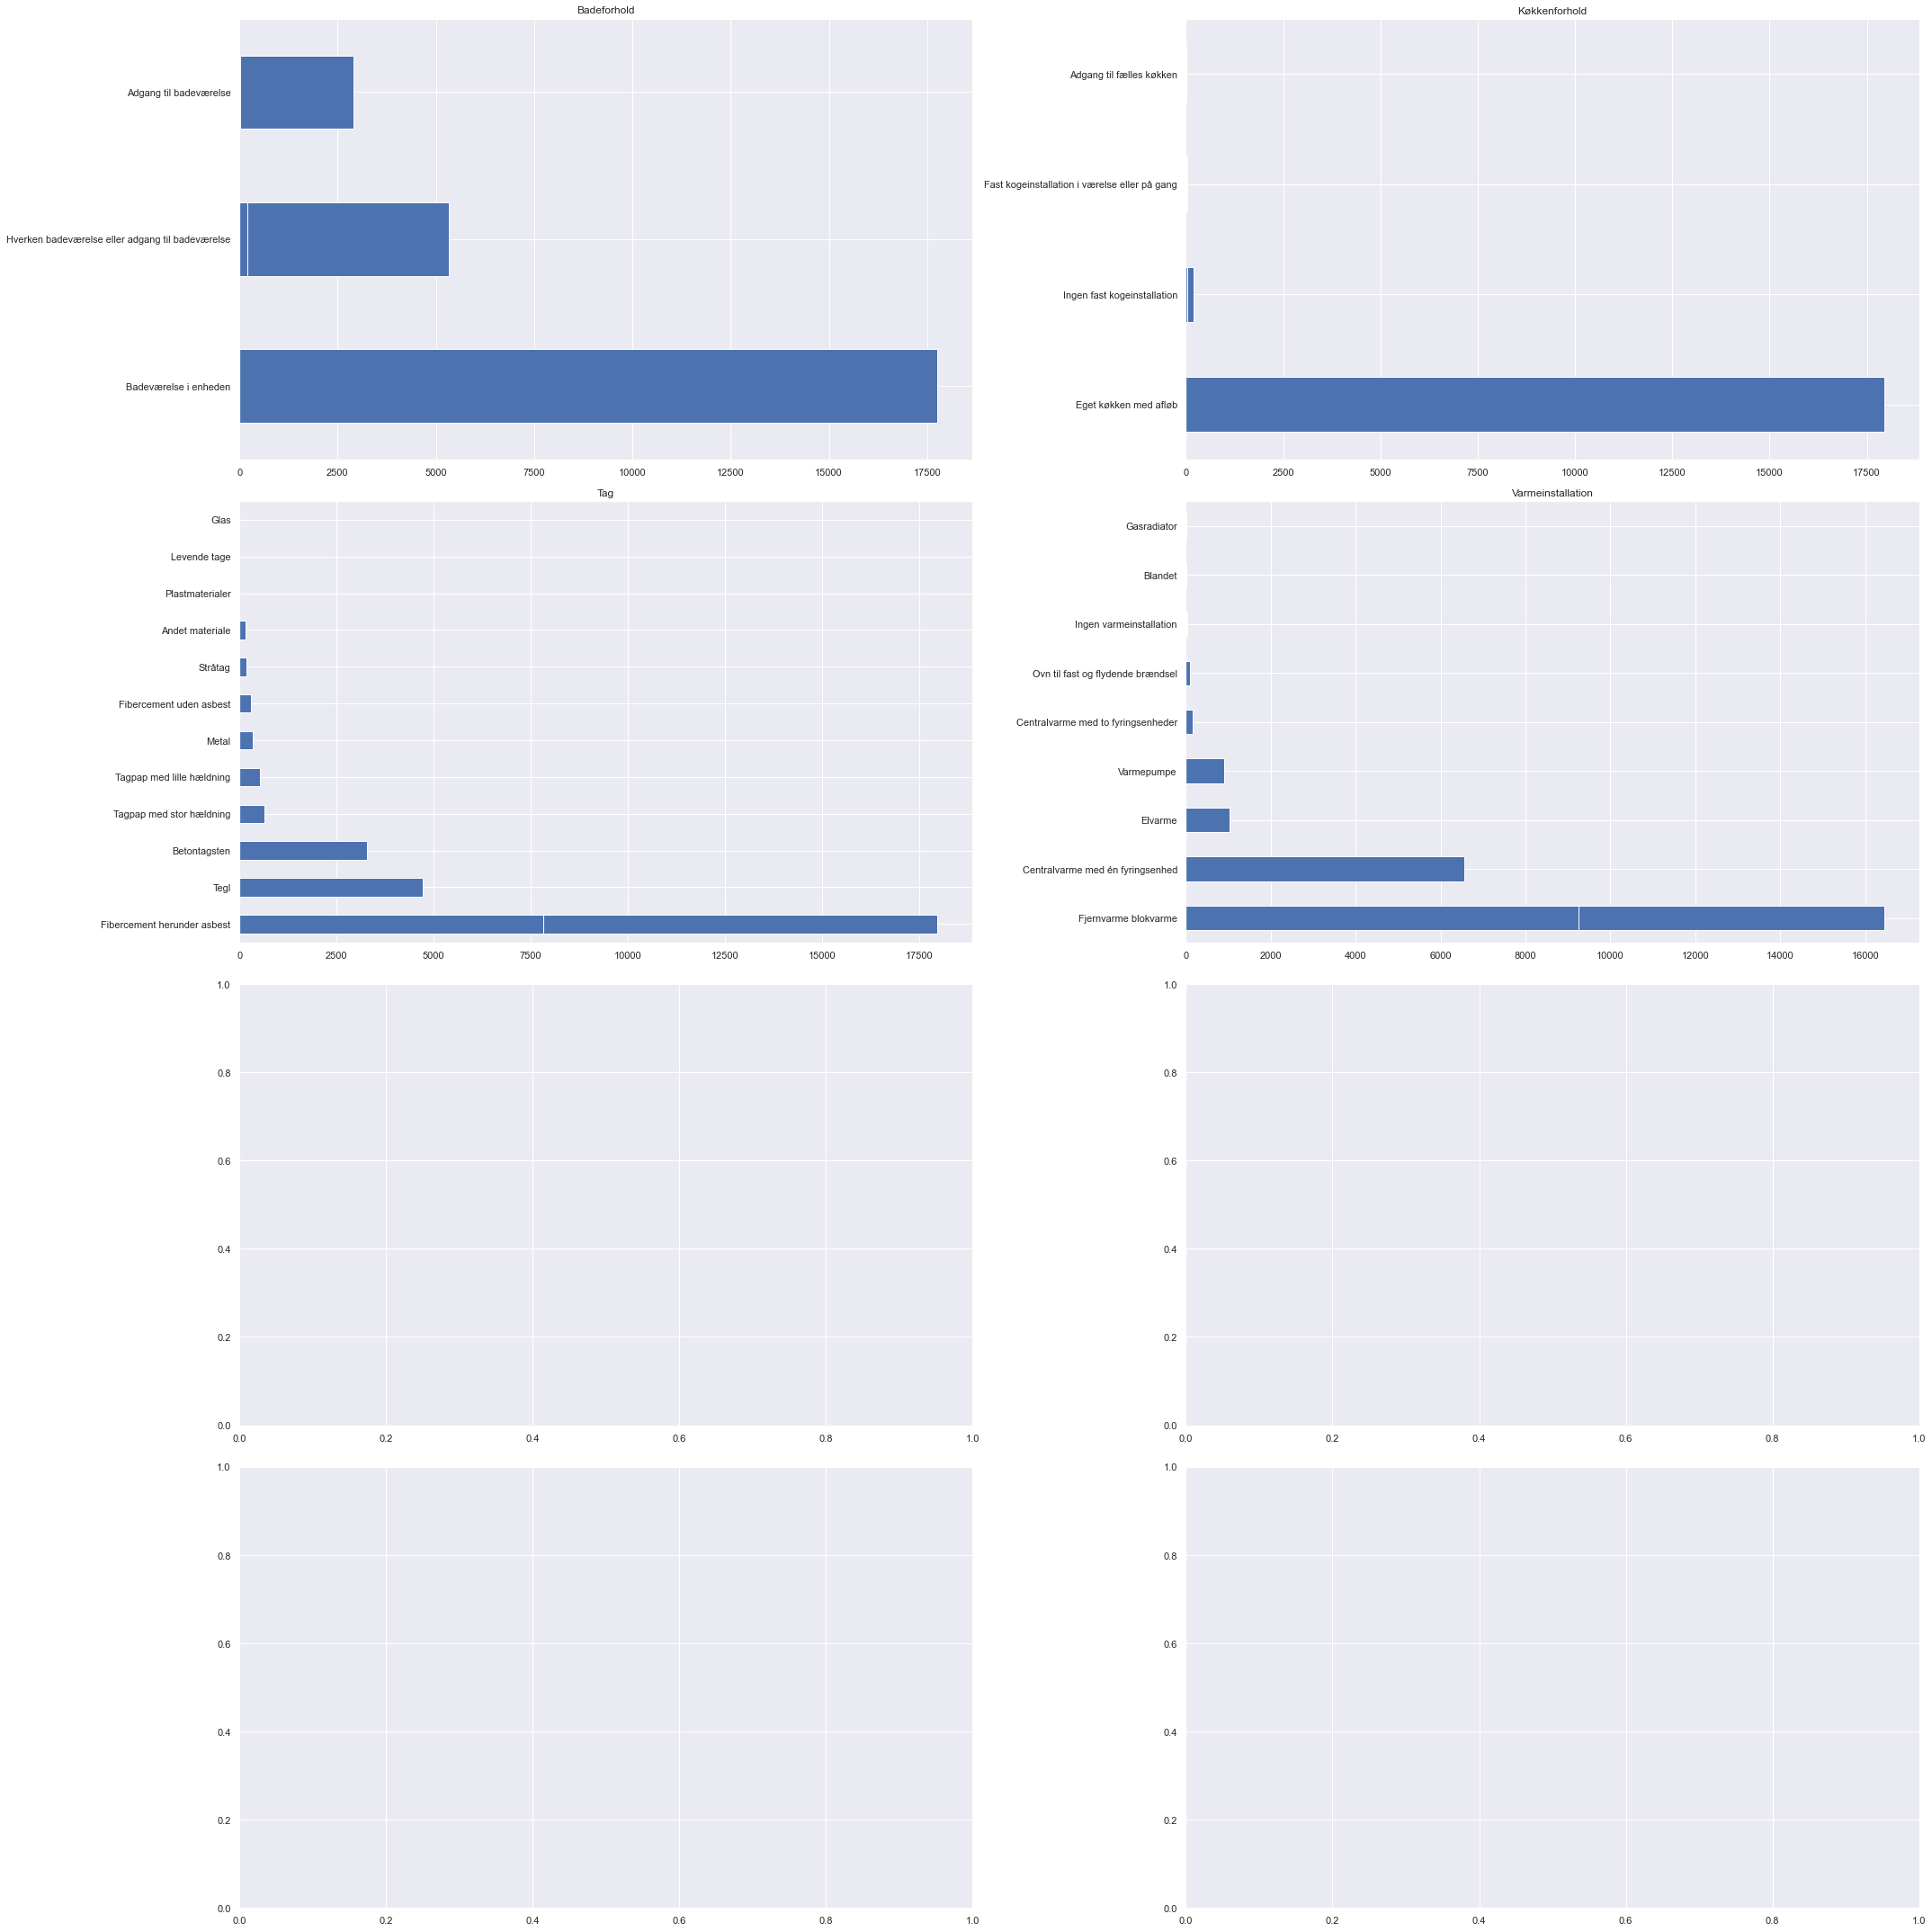

In [24]:
sb.set()
lst_out = ['Energimærke', 'Boligtype', 'Badeforhold',
           'Køkkenforhold', 'Toiletforhold',
           'Ydervæg', 'Tag', 'Varmeinstallation']
sb.set(font_scale=1)
n_row = 4
n_col = 2
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(30,30))
for i in enumerate(lst_out):
    pd.value_counts(data[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()

# drop features
data.drop([
    'Boligtype',
    'Badeforhold',
    'Køkkenforhold',
    'Toiletforhold'
], 'columns', inplace=True)

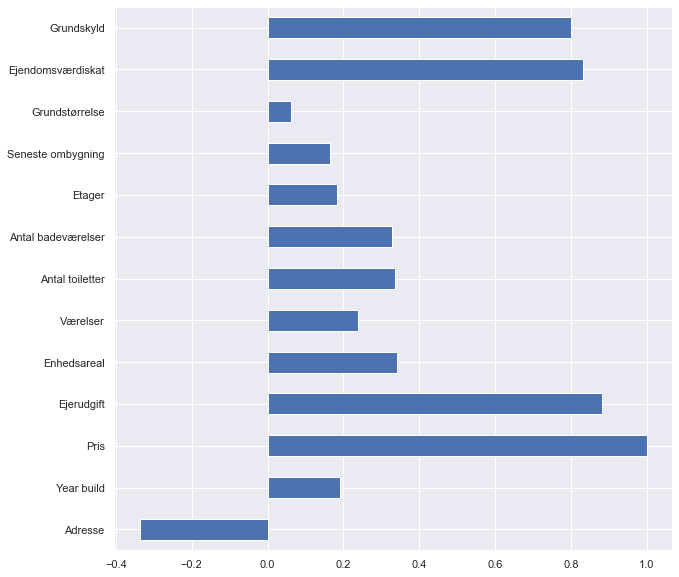

In [25]:
plt.figure(figsize=(10,10))
data.corr()['Pris'].plot(kind='barh');

##### Find unique values for categorical features

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17986 entries, 5 to 38570
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Adresse             17986 non-null  int32  
 1   Year build          17986 non-null  int32  
 2   Pris                17986 non-null  float64
 3   Energimærke         17986 non-null  object 
 4   Ejerudgift          17986 non-null  float64
 5   Enhedsareal         17986 non-null  float64
 6   Værelser            17986 non-null  float64
 7   Antal toiletter     17986 non-null  float64
 8   Antal badeværelser  17986 non-null  float64
 9   Ydervæg             17986 non-null  object 
 10  Tag                 17986 non-null  object 
 11  Etager              17986 non-null  float64
 12  Seneste ombygning   17986 non-null  float64
 13  Varmeinstallation   17986 non-null  object 
 14  Grundstørrelse      17986 non-null  float64
 15  Ejendomsværdiskat   17986 non-null  float64
 16  Grun

In [27]:
# # Energimærke
# print('Energimærke')
# print(data.Energimærke.unique())

# # Ydervæg
# print('Ydervæg')
# print(data.Ydervæg.unique())

# # Tag
# print('Tag')
# print(data.Tag.unique())

# # Varmeinstallation
# print('Varmeinstallation')
# print(data.Varmeinstallation.unique())

##### Format and clean up categorical features

In [28]:
# remove data with Energimærke '0'
data = data[data.Energimærke != '0']


##### Target - before

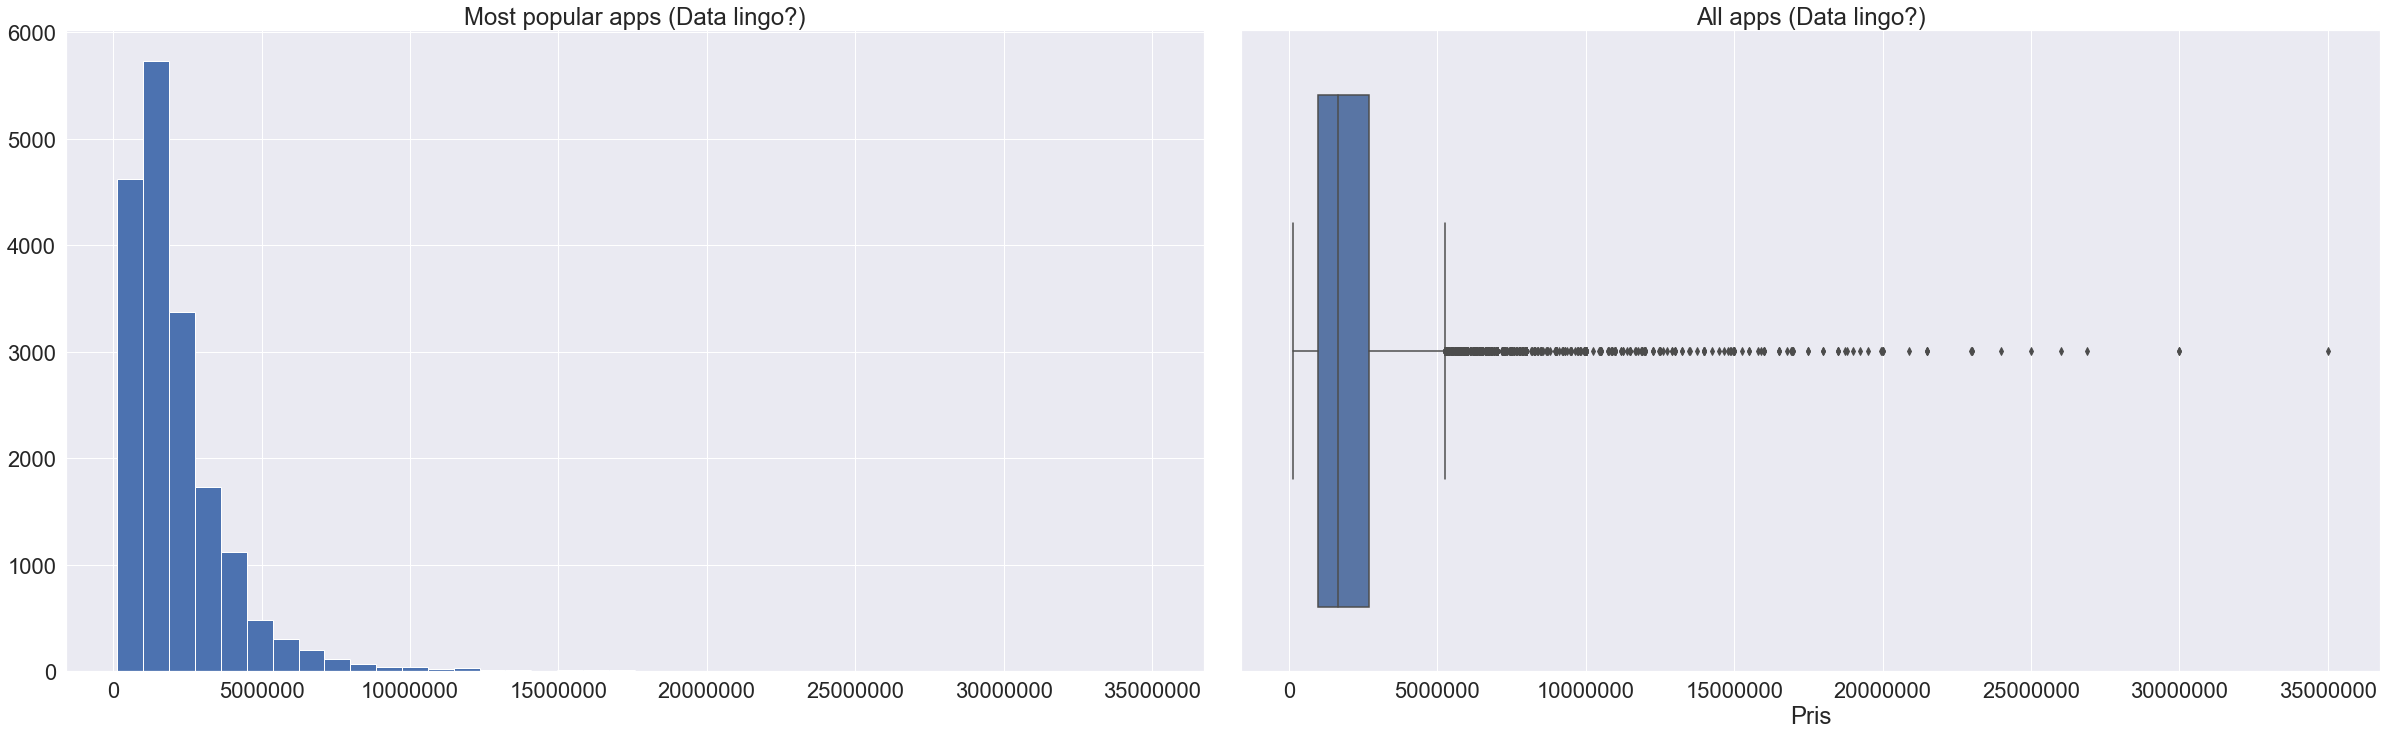

In [29]:
fig = plt.figure(figsize=(50,20))
sb.set(font_scale=2)
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('Most popular apps (Data lingo?)')
ax1.ticklabel_format(style='plain')
data['Pris'].hist(bins=40);

ax2 = fig.add_subplot(2,3,2)
ax2.set_title('All apps (Data lingo?)')
ax2.ticklabel_format(style='plain')
sb.boxplot(x=data['Pris'])
plt.tight_layout()

In [30]:
# drop data with abnormal target value
# print(pd.value_counts(data['Pris']<8000000))
# data = data[data['Pris']<8000000]
print(pd.value_counts(data['Pris']<6000000))
data = data[data['Pris']<6000000]
#target_val = data_new['SalePrice'].values

True     17345
False      627
Name: Pris, dtype: int64


##### Target - after

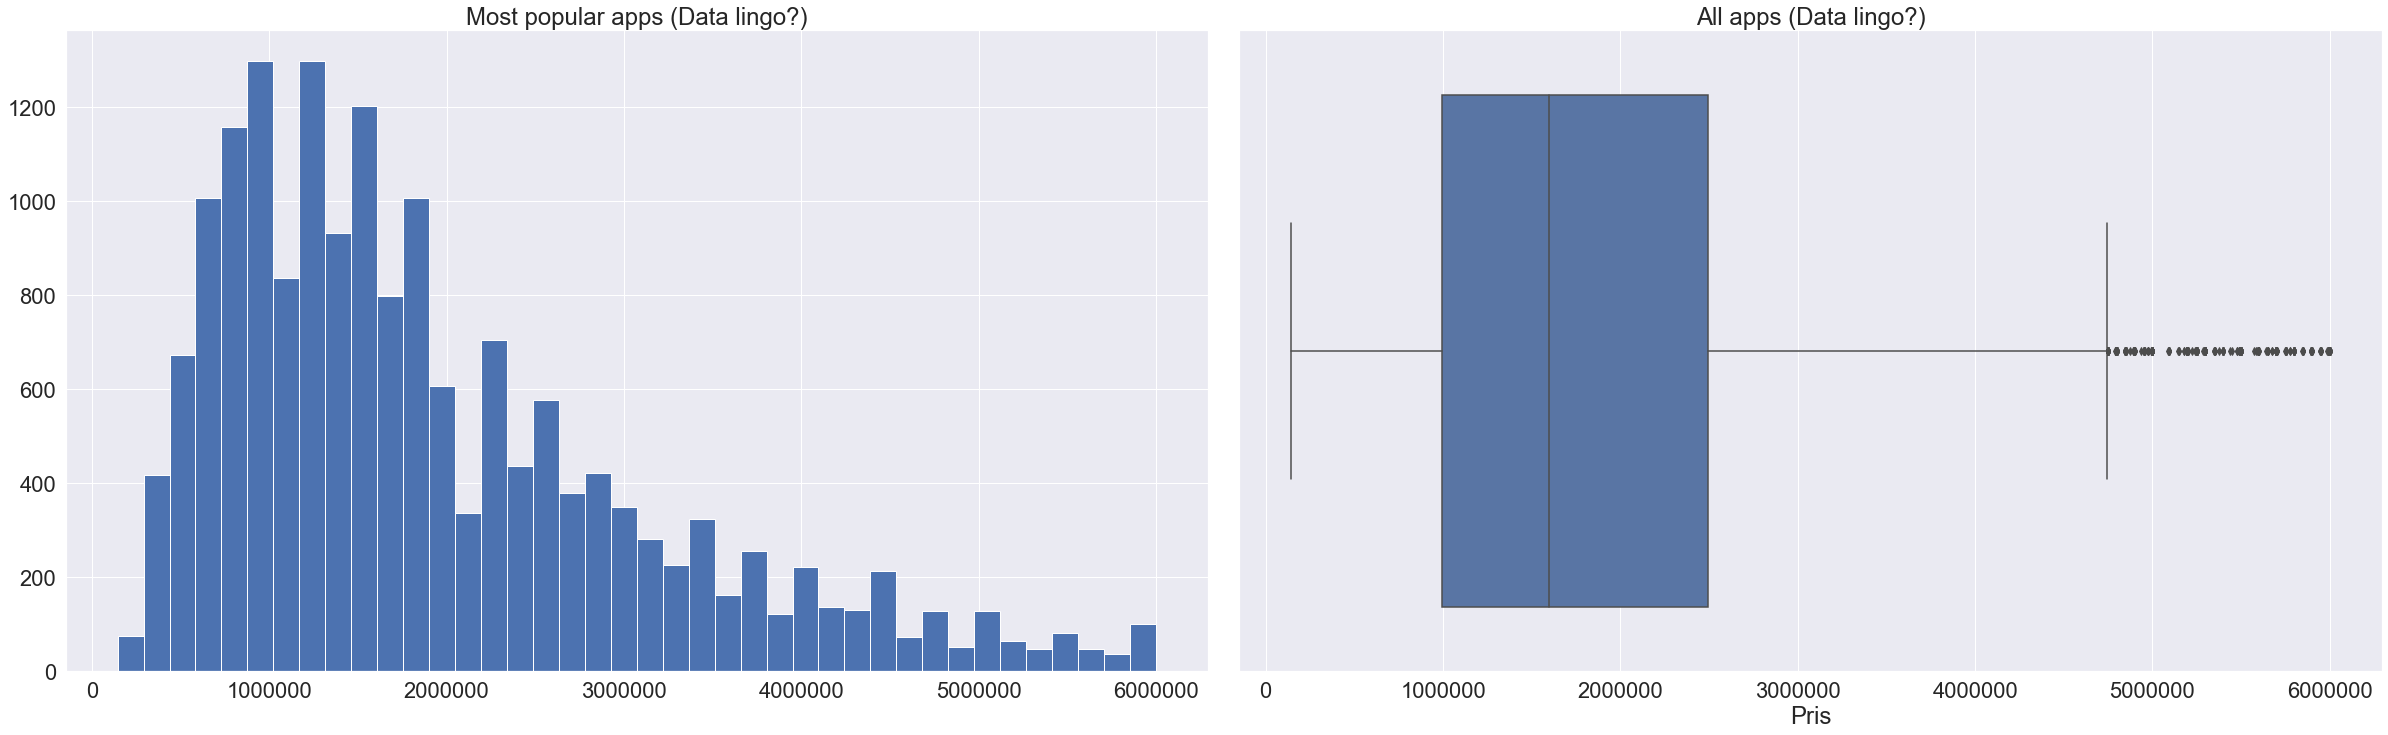

In [31]:
fig = plt.figure(figsize=(50,20))
sb.set(font_scale=2)
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('Most popular apps (Data lingo?)')
ax1.ticklabel_format(style='plain')
data['Pris'].hist(bins=40);

ax2 = fig.add_subplot(2,3,2)
ax2.set_title('All apps (Data lingo?)')
ax2.ticklabel_format(style='plain')
sb.boxplot(x=data['Pris'])
plt.tight_layout()

In [32]:
data.describe(include='all')

,Adresse,Year build,Pris,Energimærke,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Etager,Seneste ombygning,Varmeinstallation,Grundstørrelse,Ejendomsværdiskat,Grundskyld
count,17345.000000,17345.000000,1.734500e+04,17345,17345.000000,17345.000000,17345.000000,17345.000000,17345.000000,17345,17345,17345.000000,17345.000000,17345,17345.000000,17345.000000,17345.000000
unique,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,11,12,NaN,NaN,8,NaN,NaN,NaN
top,NaN,NaN,NaN,D,NaN,NaN,NaN,NaN,NaN,Mursten,Fibercement herunder asbest,NaN,NaN,Fjernvarme blokvarme,NaN,NaN,NaN
freq,NaN,NaN,NaN,5721,NaN,NaN,NaN,NaN,NaN,15876,7732,NaN,NaN,8978,NaN,NaN,NaN
mean,6828.158547,1954.506659,1.913900e+06,NaN,2222.531392,148.552724,4.897665,1.632920,1.337100,NaN,NaN,1.026924,1972.229980,NaN,803.023407,9685.269530,8314.796080
std,2068.348165,33.200234,1.212394e+06,NaN,914.427421,41.282856,1.357409,0.579765,0.518343,NaN,NaN,0.168498,29.874746,NaN,278.572283,4743.635361,6633.100807
min,2005.000000,1852.000000,1.450000e+05,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,1852.000000,NaN,0.000000,0.000000,0.000000
25%,5000.000000,1933.000000,9.950000e+05,NaN,1578.000000,120.000000,4.000000,1.000000,1.000000,NaN,NaN,1.000000,1961.000000,NaN,665.000000,6200.000000,3910.000000
50%,6950.000000,1962.000000,1.595000e+06,NaN,2040.000000,145.000000,5.000000,2.000000,1.000000,NaN,NaN,1.000000,1976.000000,NaN,805.000000,8900.000000,6789.000000
75%,8700.000000,1974.000000,2.495000e+06,NaN,2633.000000,173.000000,6.000000,2.000000,2.000000,NaN,NaN,1.000000,1995.000000,NaN,976.000000,12500.000000,10436.000000


##### Split data to numeric and categorical

In [33]:
numer = set(data.corr()['Pris'].index)
categ = list(set(data.columns) - set(data.corr()['Pris'].index))

In [34]:
numer

{'Adresse',
 'Antal badeværelser',
 'Antal toiletter',
 'Ejendomsværdiskat',
 'Ejerudgift',
 'Enhedsareal',
 'Etager',
 'Grundskyld',
 'Grundstørrelse',
 'Pris',
 'Seneste ombygning',
 'Værelser',
 'Year build'}

In [35]:
categ

['Ydervæg', 'Tag', 'Energimærke', 'Varmeinstallation']

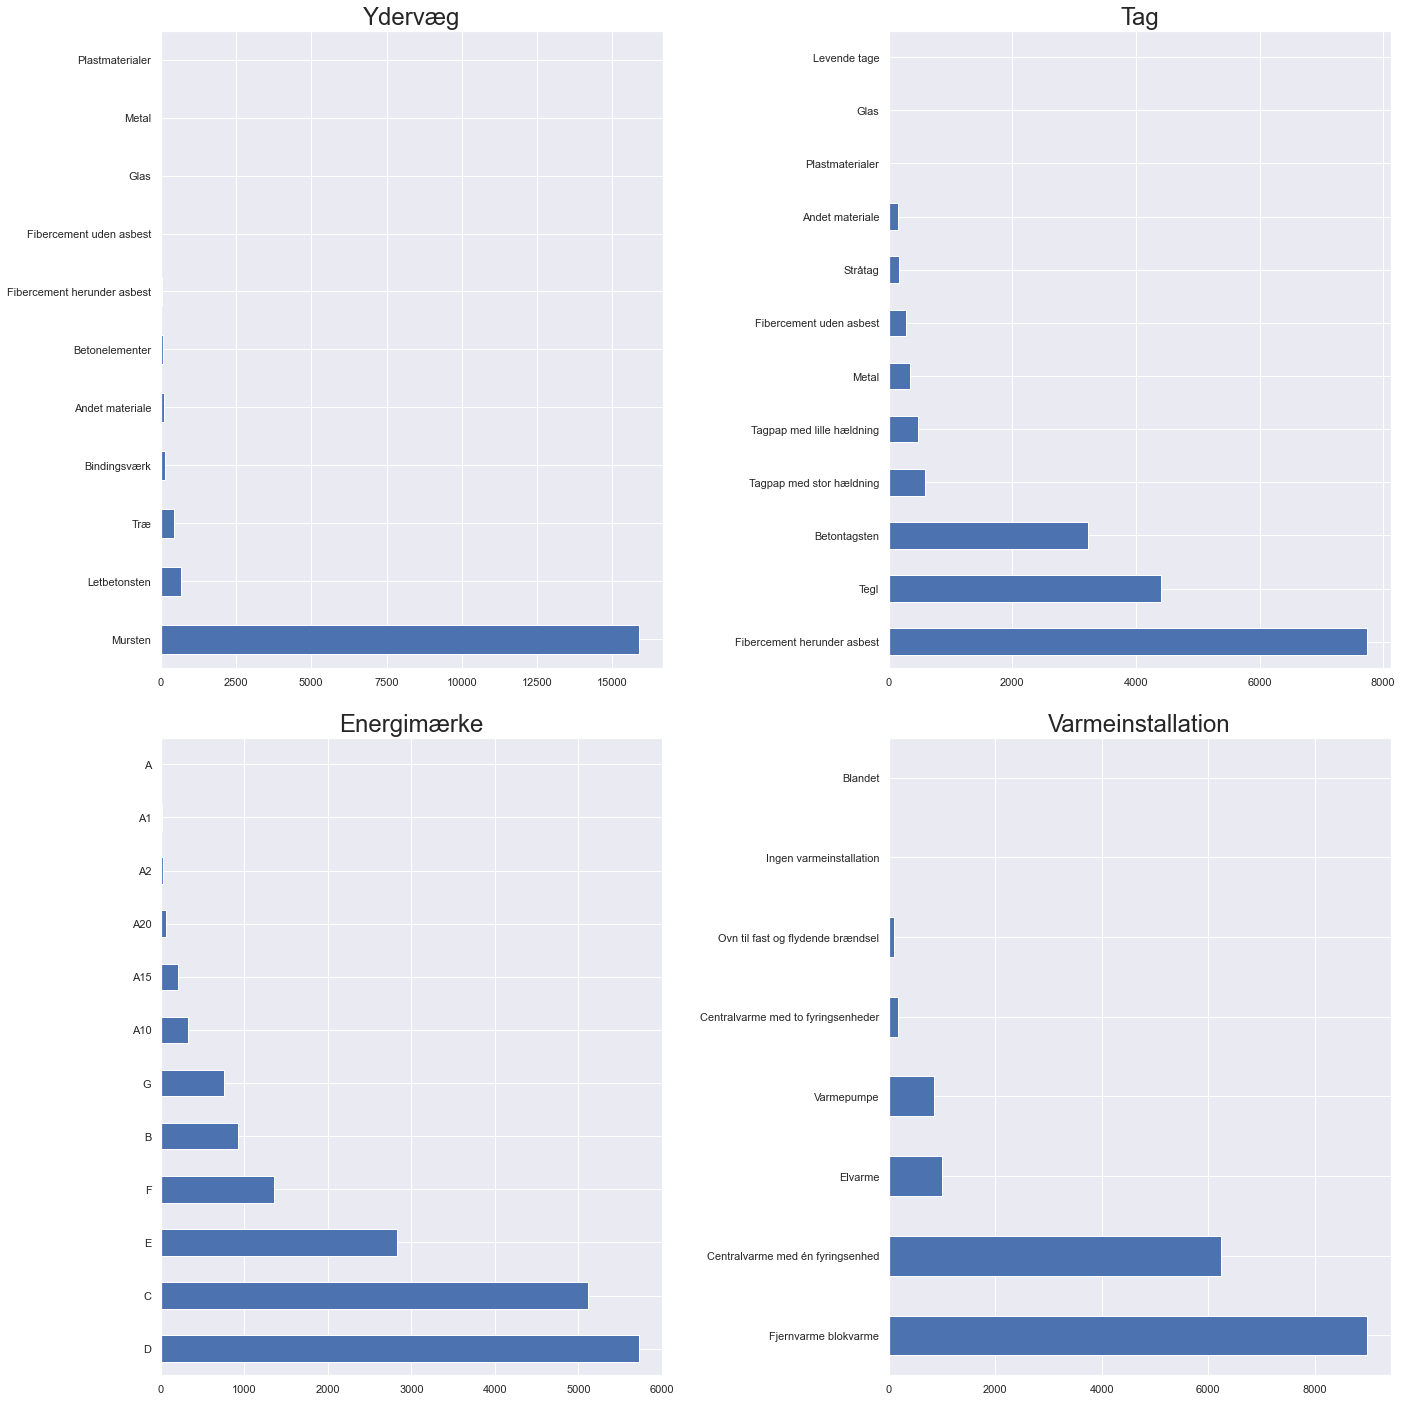

In [36]:
sb.set()
n_row = 2
n_col = 2
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
sb.set(font_scale=2)
for i in enumerate(categ):
    pd.value_counts(data[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()

In [37]:
# bring categories into a numerical format:
for i in categ:
    data[i] = data[i].factorize()[0]
data.head()

,Adresse,Year build,Pris,Energimærke,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Etager,Seneste ombygning,Varmeinstallation,Grundstørrelse,Ejendomsværdiskat,Grundskyld
5,9800,1939,395000.0,0,1146.0,110.0,3.0,1.0,1.0,0,0,1.0,1939.0,0,575.0,4400.0,3019.0
13,7830,1957,460000.0,1,1029.0,76.0,3.0,1.0,1.0,0,0,1.0,1957.0,1,1000.0,3045.0,1983.0
16,4850,1906,475000.0,1,1057.0,80.0,3.0,1.0,1.0,0,1,1.0,1906.0,1,118.0,3500.0,2949.0
17,8970,1900,495000.0,2,1104.0,135.0,4.0,1.0,1.0,0,0,1.0,1977.0,0,1119.0,4100.0,1609.0
18,6940,1944,465000.0,3,1167.0,55.0,2.0,1.0,0.0,0,2,1.0,1944.0,1,753.0,2200.0,4442.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17345 entries, 5 to 38570
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Adresse             17345 non-null  int32  
 1   Year build          17345 non-null  int32  
 2   Pris                17345 non-null  float64
 3   Energimærke         17345 non-null  int64  
 4   Ejerudgift          17345 non-null  float64
 5   Enhedsareal         17345 non-null  float64
 6   Værelser            17345 non-null  float64
 7   Antal toiletter     17345 non-null  float64
 8   Antal badeværelser  17345 non-null  float64
 9   Ydervæg             17345 non-null  int64  
 10  Tag                 17345 non-null  int64  
 11  Etager              17345 non-null  float64
 12  Seneste ombygning   17345 non-null  float64
 13  Varmeinstallation   17345 non-null  int64  
 14  Grundstørrelse      17345 non-null  float64
 15  Ejendomsværdiskat   17345 non-null  float64
 16  Grun

##### Corrplot

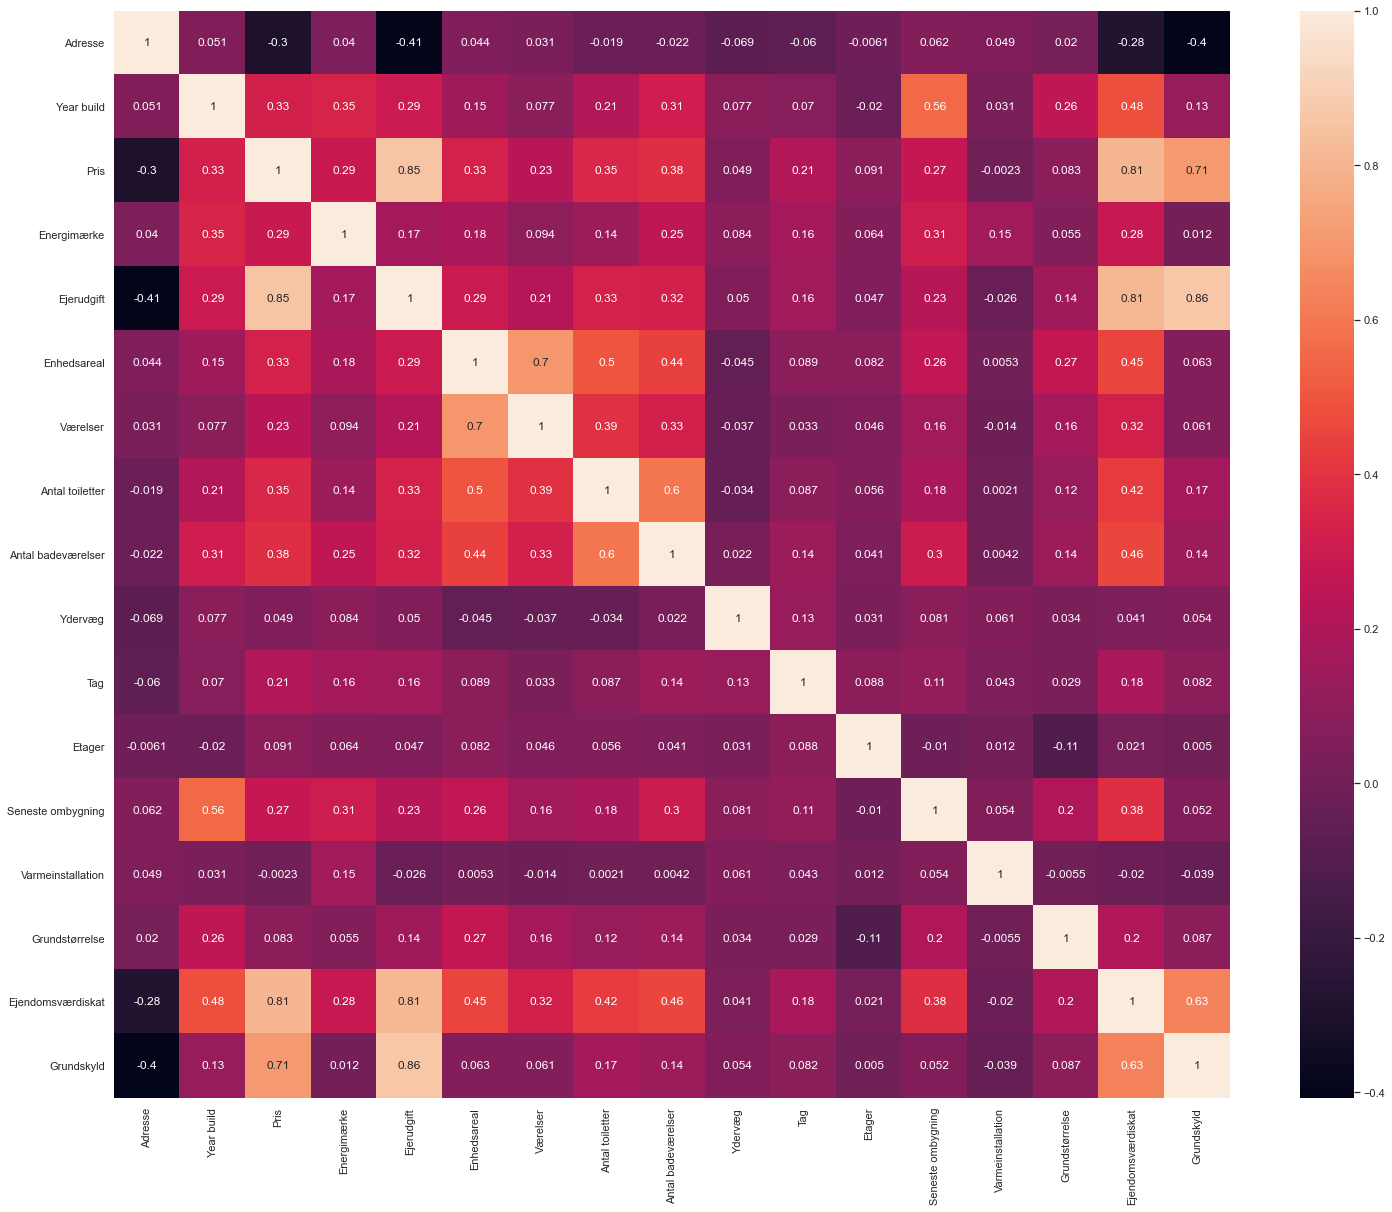

In [39]:
plt.figure(figsize=(25,20))
sb.set(font_scale=1)
sb.heatmap(data.corr(),annot=True);

In [40]:
# dropping most correlated features
#data.drop(['Antal toiletter', 'Ejendomsværdiskat', 'Grundskyld', 'Ejerudgift'], 'columns', inplace=True)
data.drop(['Ejendomsværdiskat', 'Grundskyld'], 'columns', inplace=True)

### Linear Regression Model

In [41]:
y = data['Pris']
#X = data.drop(['Pris'], 'columns', inplace=True)
# X = data[['Adresse', 'Year build', 'Energimærke', 'Ejerudgift', 'Enhedsareal', 'Værelser', 'Antal toiletter', 'Antal badeværelser',
#           'Ydervæg', 'Tag', 'Etager', 'Seneste ombygning', 'Boligstørrelse', 'Varmeinstallation', 'Grundstørrelse']]
X = data[['Adresse', 'Ydervæg', 'Year build', 'Energimærke', 'Ejerudgift', 'Enhedsareal', 'Værelser', 'Antal toiletter', 'Antal badeværelser','Tag', 'Etager', 'Seneste ombygning', 'Varmeinstallation', 'Grundstørrelse']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

lm = LinearRegression()
lm.fit(X_train, y_train)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [42]:
print(coeff_df)

                      Coefficient
Adresse                 14.969400
Ydervæg              -8697.543014
Year build            1295.261919
Energimærke          84697.828532
Ejerudgift            1061.867318
Enhedsareal           1456.975603
Værelser             -2345.343306
Antal toiletter      17355.700933
Antal badeværelser  128076.657621
Tag                  34893.166743
Etager              280742.951110
Seneste ombygning      353.580388
Varmeinstallation    -4854.714383
Grundstørrelse        -297.354983


In [43]:
print('training score')
print(lm.score(X_train, y_train))

training score
0.7673447068310131


In [44]:
print('test score')
print(lm.score(X_test, y_test))

test score
0.7683904835202171


In [45]:
predictions = lm.predict(X_test)
X_test

,Adresse,Ydervæg,Year build,Energimærke,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Tag,Etager,Seneste ombygning,Varmeinstallation,Grundstørrelse
17042,3300,0,1989,6,3248.0,196.0,6.0,2.0,2.0,5,1.0,1995.0,3,950.0
33520,8340,0,1870,2,2227.0,231.0,8.0,2.0,2.0,1,1.0,1998.0,1,974.0
9561,8722,0,2015,7,2880.0,195.0,4.0,2.0,2.0,4,1.0,2015.0,3,1118.0
20677,7600,0,1895,3,1284.0,115.0,3.0,2.0,1.0,2,1.0,1895.0,1,317.0
675,7830,0,1970,1,1328.0,138.0,4.0,1.0,1.0,0,1.0,1970.0,1,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,4241,0,1976,1,2342.0,145.0,5.0,1.0,1.0,0,1.0,1989.0,0,991.0
19797,3650,0,1967,1,3209.0,127.0,4.0,2.0,1.0,6,1.0,1967.0,0,700.0
24737,8990,0,1973,1,1537.0,148.0,5.0,1.0,1.0,0,1.0,1979.0,0,819.0
17178,4652,3,1969,1,1818.0,126.0,4.0,1.0,1.0,0,1.0,1969.0,0,801.0


In [46]:
predictions

array([3552462.43964652, 1961178.64242253, 3286690.5048379 , ...,
       1036942.69074734, 1211224.94051222, 1936638.9456531 ])

In [50]:
single_target = X_test[:1]
single_target

,Adresse,Ydervæg,Year build,Energimærke,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Tag,Etager,Seneste ombygning,Varmeinstallation,Grundstørrelse
17042,3300,0,1989,6,3248.0,196.0,6.0,2.0,2.0,5,1.0,1995.0,3,950.0


In [51]:
#predict_one = lm.predict(single_target)

array([3552462.43964653])

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
sb.displot((y_test-predictions), bins=50)

### Cluster (Not relevant now)

In [ ]:
# data_new = data.copy()
# # cut target to 5 parts and see to the distribution. So I will check significance of features to the target.
# cut_value = pd.cut(data['Pris'],5).values
# data['Pris'] = cut_value
# sb.set(font_scale=2)
# n_row = 4
# n_col = 4
# categ_targ = set(categ)
# fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
# sb.set(font_scale=2)
# sb.axes_style("whitegrid")

# for i in enumerate(categ_targ):
#     qq=sb.countplot(data[i[1]],ax=axes[i[0]//n_row,i[0]%n_col],\
#                      hue=data['Pris'])
#     qq.legend_.remove()
# plt.legend().set_title('')
# plt.tight_layout()